In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [4]:
data_dir='C:\\Users\\visha\\TEA\\teasickness'

In [5]:

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)


train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 711 images belonging to 8 classes.
Found 174 images belonging to 8 classes.


In [6]:
batch_size=32

In [7]:

base_model = VGG16(weights='imagenet', include_top=False, 
                   input_shape=(224, 224, 3))


model = Sequential()
model.add(base_model)

for layer in base_model.layers:
    layer.trainable = False


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))  

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 21139528 (80.64 MB)
Trainable params: 6424840 (24.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [8]:

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_data,
    epochs=5,
    batch_size=batch_size,
    validation_data=val_data
)

Epoch 1/5



23/23 [==============================] - 12598s 572s/step - loss: 3.2399 - accuracy: 0.2827 - val_loss: 1.6082 - val_accuracy: 0.3678
Epoch 2/5
23/23 [==============================] - 320s 14s/step - loss: 1.2709 - accuracy: 0.5471 - val_loss: 1.4590 - val_accuracy: 0.4770
Epoch 3/5
23/23 [==============================] - 312s 13s/step - loss: 0.9327 - accuracy: 0.6371 - val_loss: 1.2072 - val_accuracy: 0.5172
Epoch 4/5
23/23 [==============================] - 308s 13s/step - loss: 0.8254 - accuracy: 0.6976 - val_loss: 1.5487 - val_accuracy: 0.4598
Epoch 5/5
23/23 [==============================] - ETA: 0s - loss: 0.8174 - accuracy: 0.7004 

In [18]:
import matplotlib.pyplot as plt

def plot_loss(history):

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper right')
    plt.show()

def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='lower right')
    plt.show()



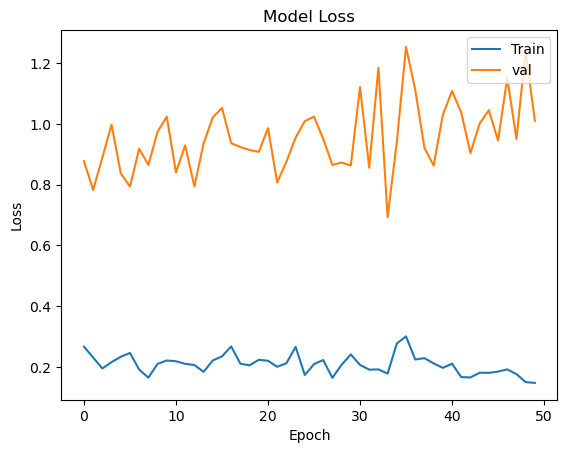

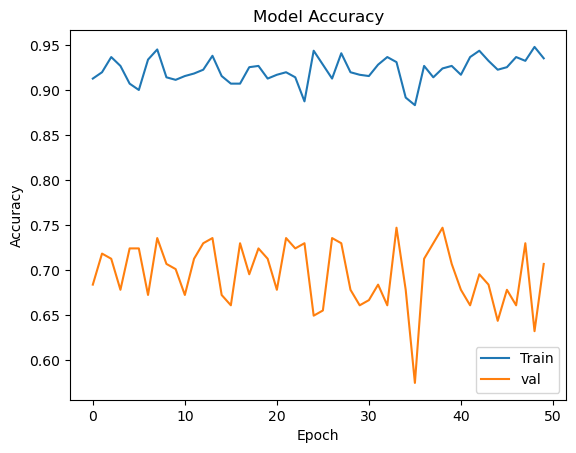

In [19]:
plot_loss(history)
plot_accuracy(history)

In [20]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.6)

test_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 528 images belonging to 8 classes.


In [21]:

loss, accuracy = model.evaluate(test_data)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

17/17 [==============================] - 152s 9s/step - loss: 0.4398 - accuracy: 0.8617
Test Loss: 0.4398183524608612
Test Accuracy: 0.8617424368858337


In [22]:

true_labels = test_data.classes
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)



17/17 [==============================] - 194s 11s/step


In [23]:

print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.08      0.10      0.09        60
           1       0.11      0.10      0.11        67
           2       0.08      0.07      0.07        60
           3       0.14      0.13      0.14        67
           4       0.12      0.13      0.13        60
           5       0.10      0.09      0.09        44
           6       0.11      0.11      0.11        85
           7       0.14      0.14      0.14        85

    accuracy                           0.11       528
   macro avg       0.11      0.11      0.11       528
weighted avg       0.11      0.11      0.11       528



In [24]:

cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 6  6  5  9  8  4 11 11]
 [ 7  7  7  6  5 13 12 10]
 [ 9  9  4  8  6  3  9 12]
 [ 6  6  7  9 13  4 10 12]
 [12  6  5  8  8  3  9  9]
 [ 8  5  4  4  6  4  7  6]
 [16 11  7 10 11  5  9 16]
 [13 12  9 12  8  6 13 12]]


1/1 [==============================] - 7s 7s/step


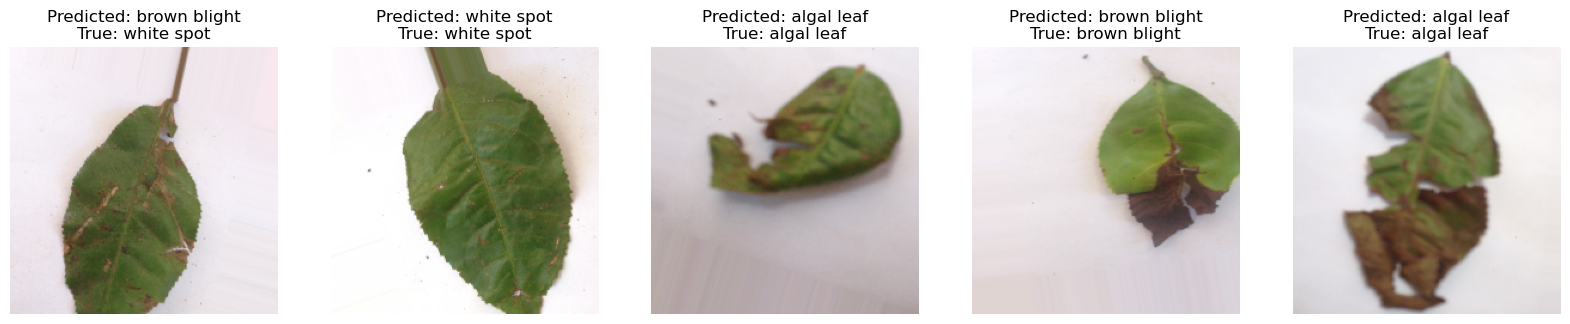

In [25]:
import matplotlib.pyplot as plt

num_images = 5
test_images, test_labels = next(test_data)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

class_names = list(test_data.class_indices.keys())
true_labels = np.argmax(test_labels, axis=1)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]

fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()


In [27]:
model.save("C:\\Users\\visha")

INFO:tensorflow:Assets written to: C:\Users\visha\assets


INFO:tensorflow:Assets written to: C:\Users\visha\assets
